# Bài tập 1.2.3 – Trực quan hóa dữ liệu Pima Indians Diabetes Dataset

## 1.Mở bài

Trong bài tập này, chúng ta sẽ thực hiện **trực quan hóa dữ liệu** trên tập dữ liệu **Pima Indians Diabetes Dataset**.  
Mục tiêu là:

- Hiểu phân phối của các biến quan trọng.  
- So sánh sự khác biệt giữa nhóm bệnh nhân có và không có tiểu đường.  
- Phát hiện xu hướng, outlier, hoặc mối quan hệ tiềm ẩn trong dữ liệu.  

Bước này là tiền đề để phân tích nâng cao, xử lý feature và xây dựng mô hình dự đoán hiệu quả.


## 2.Load thư viện và dữ liệu  

In [ ]:
# 2. Load thư viện và dữ liệu

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load dữ liệu
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')


## 3.Tổng quan dữ liệu

### 1.Xem 5 dòng đầu  

In [ ]:
# Xem 5 dòng đầu
data.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### 2.Thông tin dữ liệu

In [ ]:
# Thông tin dữ liệu
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.Biến mục tiêu (Outcome)

In [ ]:
# Biến mục tiêu Outcome
sns.countplot(x='Outcome', data=data)
plt.title('Phân bố Outcome (0=Không tiểu đường, 1=Tiểu đường)')
plt.show()

data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

## 4.Xử lý giá trị thiếu

In [ ]:
# 4. Xử lý giá trị thiếu

cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Điền giá trị thiếu
for col in ['Glucose','BloodPressure','SkinThickness','BMI']:
    data[col].fillna(data[col].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)


## 5.Trực quan hóa dữ liệu các biến quan trọng

In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


### 1.Histogram và KDE  

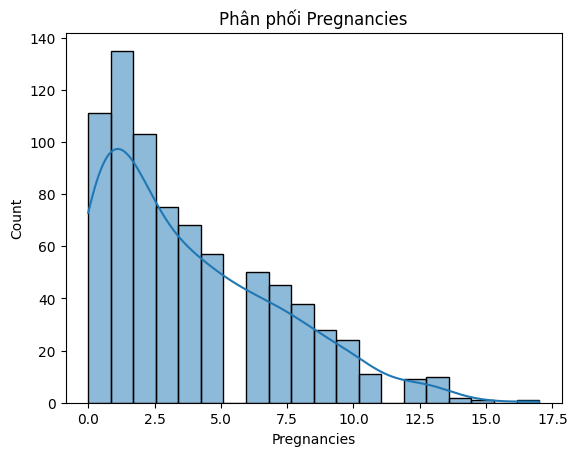

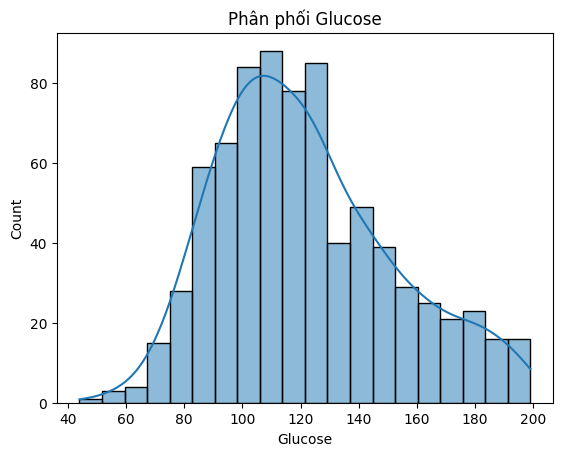

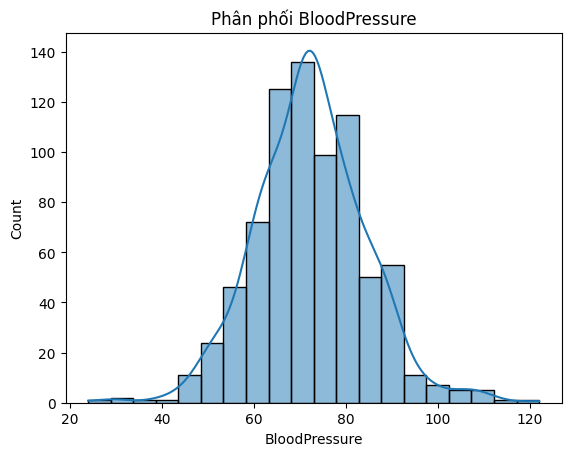

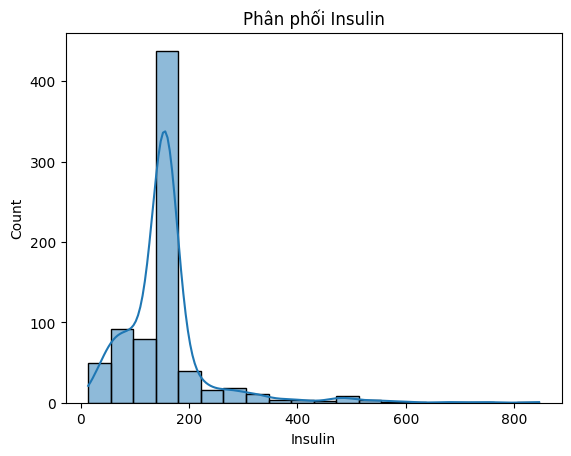

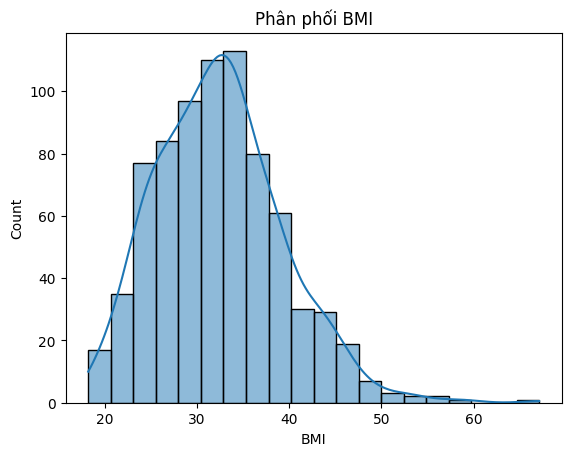

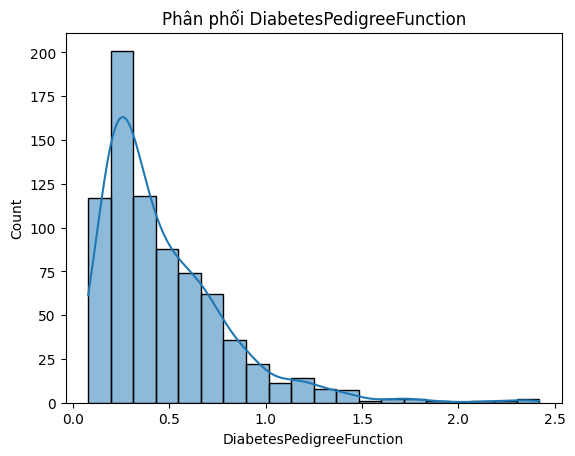

In [ ]:
for col in cols:
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Phân phối {col}')
    plt.show()

### 2.Boxplot và Violinplot

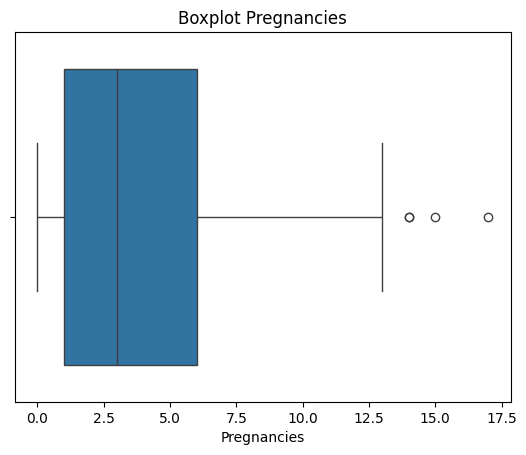

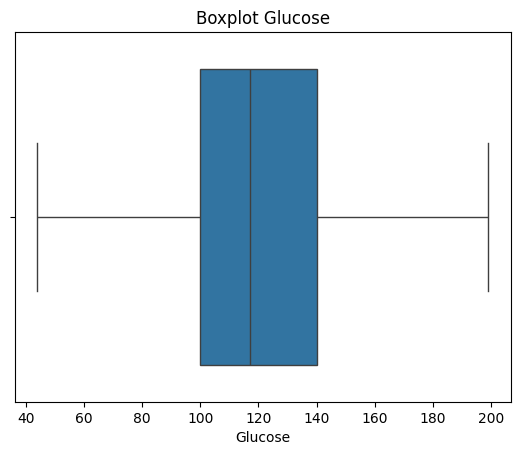

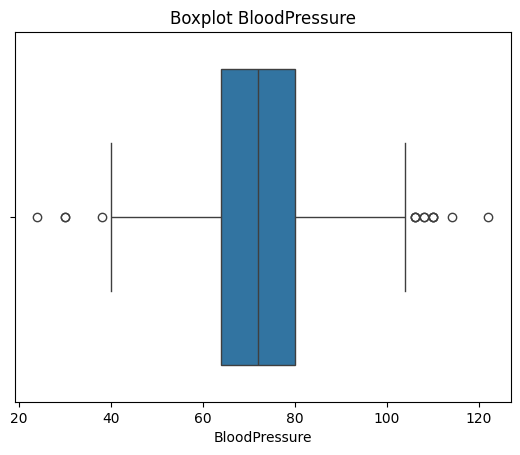

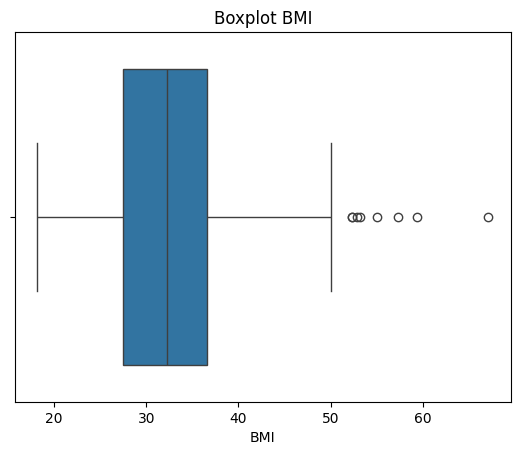

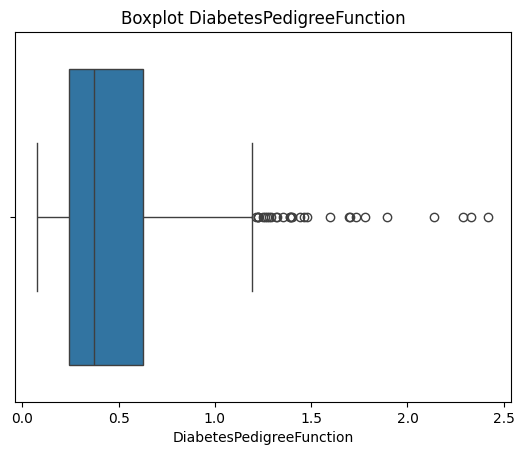

In [ ]:
for col in cols:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot {col}')
    plt.show()

## 6.So sánh các biến với Outcome  

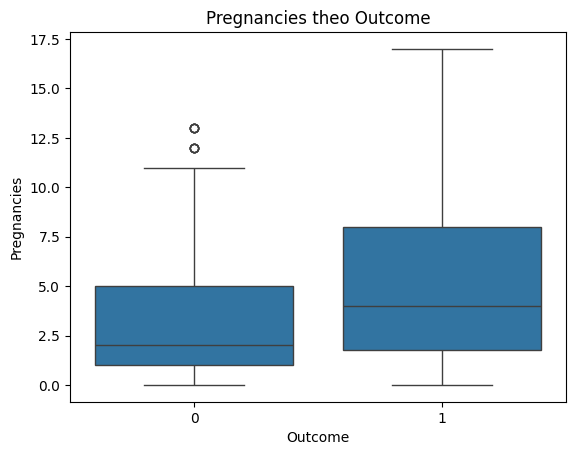

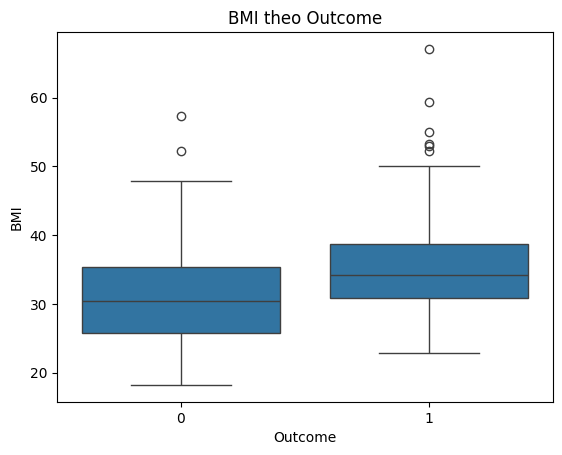

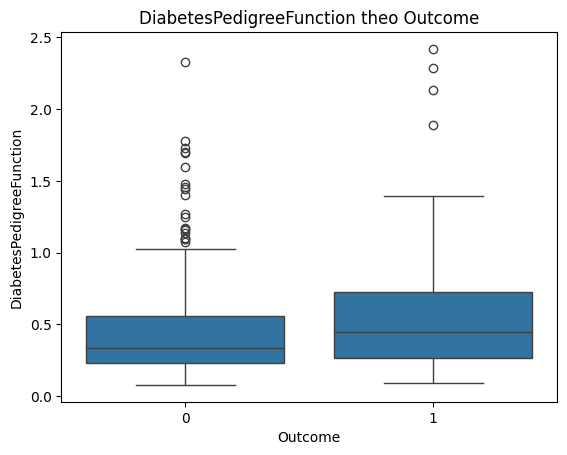

In [ ]:
for col in cols:
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} theo Outcome')
    plt.show()

## 7.Phát hiện xu hướng dữ liệu

Qua trực quan hóa:

- Nhóm bệnh nhân có tiểu đường (Outcome=1) thường có **Glucose, BMI và Age cao hơn** nhóm không tiểu đường.  
- Insulin và SkinThickness phân bố không đồng đều, cần chuẩn hóa hoặc log-transform nếu dùng trong mô hình Machine Learning.  
- Số lần mang thai (Pregnancies) có ảnh hưởng nhẹ tới nguy cơ tiểu đường, có thể kết hợp với các biến khác tạo feature mới.  
- Một số biến có outlier rõ ràng, ví dụ BMI và Insulin, cần lưu ý khi xây dựng mô hình.


## 8.Kết luận

Trực quan hóa dữ liệu giúp chúng ta:

1. Hiểu được **phân phối** từng biến, xác định các điểm bất thường (outlier) và giá trị thiếu.  
2. Nhận ra **biến quan trọng** ảnh hưởng mạnh tới Outcome: Glucose, BMI, Age.  
3. So sánh nhóm bệnh nhân có và không có tiểu đường, phát hiện xu hướng, ví dụ nhóm Outcome=1 có các chỉ số sức khỏe thường cao hơn.  
4. Phát hiện các biến cần xử lý đặc biệt trước khi xây dựng mô hình, ví dụ log-transform hoặc chuẩn hóa với Insulin, SkinThickness.  
5. Cung cấp nền tảng cho bước tiếp theo: feature engineering, scaling dữ liệu và áp dụng các thuật toán Machine Learning như LightGBM, KNN, hay ensemble methods để dự đoán tiểu đường chính xác hơn.

**Tóm lại**, trực quan hóa dữ liệu là bước quan trọng để nắm bắt thông tin, hiểu mối quan hệ giữa các biến, từ đó chuẩn bị dữ liệu tốt cho các bước phân tích nâng cao và xây dựng mô hình dự đoán.
